# Proyek Analisis Penjualan E-commerce Pakistan

## Pertanyaan Seputar Topik

1. Berapa total penjualan bersih untuk data yang difilter saat ini?
2. Berapa rata-rata nilai pesanan untuk data yang difilter saat ini?
3. Kategori produk apa yang memiliki penjualan bersih tertinggi saat ini?
4. Metode pembayaran apa yang paling sering digunakan oleh pelanggan?
5. Hari apa dalam seminggu yang memiliki penjualan bersih tertinggi?

Menyaipkan semua library yang dibutuhkan

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Wrangling

Gathering Data

In [304]:

# Load dataset utama
ecommerce_df = pd.read_csv("C:/Users/ASUS/Documents/Analisis_Data/Pakistan Largest Ecommerce Dataset.csv", low_memory=False)

# Membuat subset tabel-tabel
customers_df = ecommerce_df[['Customer ID', 'sales_commission_code', 'Customer Since']].drop_duplicates()
orders_df = ecommerce_df[['increment_id', 'created_at', 'status', 'payment_method', 'grand_total']].drop_duplicates()
products_df = ecommerce_df[['item_id', 'sku', 'category_name_1', 'price']].drop_duplicates()
sales_df = ecommerce_df[['increment_id', 'item_id', 'qty_ordered', 'price', 'discount_amount']].drop_duplicates()


In [305]:
print(ecommerce_df.columns.tolist())

['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered', 'grand_total', 'increment_id', 'category_name_1', 'sales_commission_code', 'discount_amount', 'payment_method', 'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since', 'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']


In [306]:
customers_df = ecommerce_df[['Customer ID', 'sales_commission_code', 'Customer Since']].drop_duplicates()
print("\nCustomers Dataset:")
customers_df.head()


Customers Dataset:


,Customer ID,sales_commission_code,Customer Since
0,1.0,\N,2016-7
1,2.0,\N,2016-7
2,3.0,\N,2016-7
3,4.0,R-FSD-52352,2016-7
4,5.0,\N,2016-7


In [307]:
orders_df = ecommerce_df[['increment_id', 'created_at', 'status', 'payment_method', 'grand_total']].drop_duplicates()
print("\nOrders Dataset:")
orders_df.head()


Orders Dataset:


,increment_id,created_at,status,payment_method,grand_total
0,100147443,7/1/2016,complete,cod,1950.0
1,100147444,7/1/2016,canceled,cod,240.0
2,100147445,7/1/2016,canceled,cod,2450.0
3,100147446,7/1/2016,complete,cod,60.0
4,100147447,7/1/2016,order_refunded,cod,1110.0


In [308]:
products_df = ecommerce_df[['item_id', 'sku', 'category_name_1', 'price']].drop_duplicates()
print("\nProducts Dataset:")
products_df.head()


Products Dataset:


,item_id,sku,category_name_1,price
0,211131.0,kreations_YI 06-L,Women's Fashion,1950.0
1,211133.0,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,Beauty & Grooming,240.0
2,211134.0,Ego_UP0017-999-MR0,Women's Fashion,2450.0
3,211135.0,kcc_krone deal,Beauty & Grooming,360.0
4,211136.0,BK7010400AG,Soghaat,555.0


In [309]:
sales_df = ecommerce_df[['increment_id', 'item_id', 'qty_ordered', 'price', 'discount_amount']].drop_duplicates()
print("\nSales Dataset:")
sales_df.head()


Sales Dataset:


,increment_id,item_id,qty_ordered,price,discount_amount
0,100147443,211131.0,1.0,1950.0,0.0
1,100147444,211133.0,1.0,240.0,0.0
2,100147445,211134.0,1.0,2450.0,0.0
3,100147446,211135.0,1.0,360.0,300.0
4,100147447,211136.0,2.0,555.0,0.0


Assessing Data

Menilai tabel ecommerce.df (dataset utama)

In [310]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [311]:
ecommerce_df.isna().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601229
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

In [312]:
print("Jumlah duplikasi: ", ecommerce_df.duplicated().sum())

Jumlah duplikasi:  464050


In [313]:
ecommerce_df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


menilai tabel customers_df

In [314]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134452 entries, 0 to 584520
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            134451 non-null  float64
 1   sales_commission_code  98345 non-null   object 
 2   Customer Since         134451 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.1+ MB


In [315]:
customers_df.isna().sum()

Customer ID                  1
sales_commission_code    36107
Customer Since               1
dtype: int64

In [316]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [317]:
customers_df.describe()

,Customer ID
count,134451.000000
mean,54984.755904
std,33636.707813
min,1.000000
25%,25588.500000
50%,54951.000000
75%,83205.500000
max,115326.000000


Menilai Tabel orders_df

In [318]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408783 entries, 0 to 584524
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   increment_id    408782 non-null  object 
 1   created_at      408782 non-null  object 
 2   status          408771 non-null  object 
 3   payment_method  408782 non-null  object 
 4   grand_total     408782 non-null  float64
dtypes: float64(1), object(4)
memory usage: 18.7+ MB


In [319]:
orders_df.nunique()

increment_id      408782
created_at           789
status                16
payment_method        18
grand_total        36829
dtype: int64

In [320]:
orders_df.isna().sum()

increment_id       1
created_at         1
status            12
payment_method     1
grand_total        1
dtype: int64

In [321]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [322]:
orders_df.describe()

,grand_total
count,4.087820e+05
mean,9.531793e+03
std,5.308868e+04
min,-1.594000e+03
25%,8.000000e+02
50%,1.996000e+03
75%,1.042300e+04
max,1.788800e+07


menilai products_df

In [323]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584525 entries, 0 to 584524
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          584524 non-null  float64
 1   sku              584504 non-null  object 
 2   category_name_1  584360 non-null  object 
 3   price            584524 non-null  float64
dtypes: float64(2), object(2)
memory usage: 22.3+ MB


In [324]:
products_df.isna().sum()

item_id              1
sku                 21
category_name_1    165
price                1
dtype: int64

In [325]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [326]:
products_df.nunique()

item_id            584524
sku                 84889
category_name_1        16
price                9121
dtype: int64

In [327]:
products_df.describe()

,item_id,price
count,584524.000000,5.845240e+05
mean,565667.074218,6.348748e+03
std,200121.173648,1.494927e+04
min,211131.000000,0.000000e+00
25%,395000.750000,3.600000e+02
50%,568424.500000,8.990000e+02
75%,739106.250000,4.070000e+03
max,905208.000000,1.012626e+06


Menilai Tabel sales_df

In [328]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584525 entries, 0 to 584524
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   increment_id     584524 non-null  object 
 1   item_id          584524 non-null  float64
 2   qty_ordered      584524 non-null  float64
 3   price            584524 non-null  float64
 4   discount_amount  584524 non-null  float64
dtypes: float64(4), object(1)
memory usage: 26.8+ MB


In [329]:
sales_df.isna().sum()

increment_id       1
item_id            1
qty_ordered        1
price              1
discount_amount    1
dtype: int64

In [330]:
print("Jumlah duplikasi: ", sales_df.duplicated().sum())

Jumlah duplikasi:  0


In [331]:
sales_df.describe()

,item_id,qty_ordered,price,discount_amount
count,584524.000000,584524.000000,5.845240e+05,584524.000000
mean,565667.074218,1.296388,6.348748e+03,499.492775
std,200121.173648,3.996061,1.494927e+04,1506.943046
min,211131.000000,1.000000,0.000000e+00,-599.500000
25%,395000.750000,1.000000,3.600000e+02,0.000000
50%,568424.500000,1.000000,8.990000e+02,0.000000
75%,739106.250000,1.000000,4.070000e+03,160.500000
max,905208.000000,1000.000000,1.012626e+06,90300.000000


Cleaning Data

membersihkan tabel ecommerce_df

duplicate data

In [332]:
ecommerce_df.duplicated().sum()

np.int64(464050)

In [333]:
ecommerce_df.drop_duplicates(inplace=True)

In [334]:
print("Jumlah duplikasi: ", ecommerce_df.duplicated().sum())

Jumlah duplikasi:  0


Membersihkan tabel customers_df

duplicate data

In [335]:
customers_df.duplicated().sum()

np.int64(0)

In [336]:
customers_df.drop_duplicates(inplace=True)

In [337]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


missing values

missing values costumers_df

In [338]:
customers_df.isna().sum()

Customer ID                  1
sales_commission_code    36107
Customer Since               1
dtype: int64

In [ ]:
#menghapus baris dari DataFrame customers_df yang memiliki nilai yang hilang 
customers_df.dropna(subset=['Customer ID', 'Customer Since'], inplace=True)

In [ ]:
#menghitung proporsi nilai yang hilang (missing values) 
total_rows = len(customers_df)
missing_prop = 36107 / total_rows
print(f"Proporsi missing values di sales_commission_code: {missing_prop:.2%}")

Proporsi missing values di sales_commission_code: 26.86%


In [341]:
customers_df.isna().sum()

Customer ID                  0
sales_commission_code    36106
Customer Since               0
dtype: int64

missing values orders_df

In [342]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408783 entries, 0 to 584524
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   increment_id    408782 non-null  object 
 1   created_at      408782 non-null  object 
 2   status          408771 non-null  object 
 3   payment_method  408782 non-null  object 
 4   grand_total     408782 non-null  float64
dtypes: float64(1), object(4)
memory usage: 18.7+ MB


In [343]:
orders_df.isna().sum()

increment_id       1
created_at         1
status            12
payment_method     1
grand_total        1
dtype: int64

In [344]:
# Menghapus baris yang memiliki missing values di kolom 'status'
print("Jumlah missing values di 'status' sebelum penghapusan:", orders_df['status'].isna().sum())
orders_df.dropna(subset=['status'], inplace=True)
print("Jumlah missing values di 'status' setelah penghapusan:", orders_df['status'].isna().sum())

Jumlah missing values di 'status' sebelum penghapusan: 12
Jumlah missing values di 'status' setelah penghapusan: 0


In [345]:
print(orders_df.isna().sum())


increment_id      0
created_at        0
status            0
payment_method    0
grand_total       0
dtype: int64


Inaccurate value

In [346]:
customers_df.describe()

,Customer ID
count,134451.000000
mean,54984.755904
std,33636.707813
min,1.000000
25%,25588.500000
50%,54951.000000
75%,83205.500000
max,115326.000000


In [347]:
duplicates = customers_df[customers_df.duplicated(subset=['Customer ID'], keep=False)]


In [348]:
#Pastikan tipe datanya adalah datetime
customers_df['Customer Since'] = pd.to_datetime(customers_df['Customer Since'], errors='coerce')

In [349]:
print("\n--- Pemeriksaan Kolom 'Customer Since' ---")
# Pastikan tipe datanya adalah datetime
customers_df['Customer Since'] = pd.to_datetime(customers_df['Customer Since'], errors='coerce')

# Periksa kembali apakah ada NaN yang muncul setelah konversi (jika ada format yang tidak bisa diubah)
if customers_df['Customer Since'].isna().any():
    print("Ditemukan NaN setelah konversi 'Customer Since' ke datetime. Perlu penanganan lebih lanjut.")
    
else:
    print("Kolom 'Customer Since' berhasil dikonversi ke tipe data datetime.")
    print(f"Tanggal Customer Since terlama: {customers_df['Customer Since'].min()}")
    print(f"Tanggal Customer Since terbaru: {customers_df['Customer Since'].max()}")

    from datetime import datetime
    # Periksa apakah ada tanggal di masa depan (tidak masuk akal untuk 'Customer Since')
    future_dates = customers_df[customers_df['Customer Since'] > datetime.now()]
    if not future_dates.empty:
        print("\nDitemukan tanggal 'Customer Since' di masa depan (tidak akurat):")
        print(future_dates)
    
    else:
        print("Tidak ditemukan tanggal 'Customer Since' di masa depan.")


--- Pemeriksaan Kolom 'Customer Since' ---
Kolom 'Customer Since' berhasil dikonversi ke tipe data datetime.
Tanggal Customer Since terlama: 2016-07-01 00:00:00
Tanggal Customer Since terbaru: 2018-08-01 00:00:00
Tidak ditemukan tanggal 'Customer Since' di masa depan.


In [350]:
customers_df.describe()

,Customer ID,Customer Since
count,134451.000000,134451
mean,54984.755904,2017-06-21 07:01:26.833121280
min,1.000000,2016-07-01 00:00:00
25%,25588.500000,2016-11-01 00:00:00
50%,54951.000000,2017-07-01 00:00:00
75%,83205.500000,2017-12-01 00:00:00
max,115326.000000,2018-08-01 00:00:00
std,33636.707813,NaN


Membersihkan tabel orders_df

In [351]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408771 entries, 0 to 584521
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   increment_id    408771 non-null  object 
 1   created_at      408771 non-null  object 
 2   status          408771 non-null  object 
 3   payment_method  408771 non-null  object 
 4   grand_total     408771 non-null  float64
dtypes: float64(1), object(4)
memory usage: 18.7+ MB


In [352]:
# Periksa tipe data setiap kolom di orders_df
print("Tipe data orders_df saat ini:")
print(orders_df.dtypes)

Tipe data orders_df saat ini:
increment_id       object
created_at         object
status             object
payment_method     object
grand_total       float64
dtype: object


memperbaiki tipe data

In [ ]:
#mengonversi kolom created_at di DataFrame orders_df menjadi format tanggal dan waktu (datetime).
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'], errors='coerce')


In [354]:
print("Tipe data orders_df setelah konversi 'created_at':")
print(orders_df.dtypes)

Tipe data orders_df setelah konversi 'created_at':
increment_id              object
created_at        datetime64[ns]
status                    object
payment_method            object
grand_total              float64
dtype: object


In [355]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408771 entries, 0 to 584521
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   increment_id    408771 non-null  object        
 1   created_at      408771 non-null  datetime64[ns]
 2   status          408771 non-null  object        
 3   payment_method  408771 non-null  object        
 4   grand_total     408771 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 18.7+ MB


In [356]:
#memeriksa duplikat incremen id
duplicates_id = orders_df[orders_df.duplicated(subset=['increment_id'], keep=False)]


In [357]:
#memeriksa status
orders_df['status'].value_counts()

status
complete          169502
canceled          148656
order_refunded     49067
received           35806
refund              4091
cod                  880
closed               332
paid                 294
pending               43
payment_review        39
processing            20
holded                20
fraud                 10
pending_paypal         5
exchange               4
\N                     2
Name: count, dtype: int64

In [ ]:
#Standarisasi 'status' ke huruf kapital dan hapus spasi ekstra (untuk memastikan konsistensi awal)
orders_df['status'] = orders_df['status'].astype(str).str.strip().str.upper()
print("\nNilai unik 'status' setelah standarisasi dasar:")
print(orders_df['status'].value_counts())



Nilai unik 'status' setelah standarisasi dasar:
status
COMPLETE          169502
CANCELED          148656
ORDER_REFUNDED     49067
RECEIVED           35806
REFUND              4091
COD                  880
CLOSED               332
PAID                 294
PENDING               43
PAYMENT_REVIEW        39
PROCESSING            20
HOLDED                20
FRAUD                 10
PENDING_PAYPAL         5
EXCHANGE               4
\N                     2
Name: count, dtype: int64


In [359]:
#Menyatukan nilai status yang serupa
# Menggabungkan 'REFUND' dan 'ORDER_REFUNDED' menjadi satu kategori 'REFUNDED'
orders_df['status'] = orders_df['status'].replace({
    'REFUND': 'REFUNDED',
    'ORDER_REFUNDED': 'REFUNDED'
})

In [360]:
orders_df.head()

,increment_id,created_at,status,payment_method,grand_total
0,100147443,2016-07-01,COMPLETE,cod,1950.0
1,100147444,2016-07-01,CANCELED,cod,240.0
2,100147445,2016-07-01,CANCELED,cod,2450.0
3,100147446,2016-07-01,COMPLETE,cod,60.0
4,100147447,2016-07-01,REFUNDED,cod,1110.0



Membersihkan tabel product_df

In [361]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584525 entries, 0 to 584524
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          584524 non-null  float64
 1   sku              584504 non-null  object 
 2   category_name_1  584360 non-null  object 
 3   price            584524 non-null  float64
dtypes: float64(2), object(2)
memory usage: 22.3+ MB


missing values

In [362]:
print(products_df.isna().sum())

item_id              1
sku                 21
category_name_1    165
price                1
dtype: int64


In [363]:
# Menghapus semua baris yang mengandung missing values di kolom manapun
products_df.dropna(inplace=True)

In [364]:
print(products_df.isna().sum())

item_id            0
sku                0
category_name_1    0
price              0
dtype: int64


perbaikan tipe data

In [365]:
print(products_df.dtypes)

item_id            float64
sku                 object
category_name_1     object
price              float64
dtype: object


In [366]:
# Konversi kolom 'item_id' dari float64 ke int64
products_df['item_id'] = products_df['item_id'].astype('int64')

In [367]:
print(products_df.dtypes)

item_id              int64
sku                 object
category_name_1     object
price              float64
dtype: object


In [368]:
print(products_df.head())

   item_id                                                sku  \
0   211131                                  kreations_YI 06-L   
1   211133  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   
2   211134                                 Ego_UP0017-999-MR0   
3   211135                                     kcc_krone deal   
4   211136                                        BK7010400AG   

     category_name_1   price  
0    Women's Fashion  1950.0  
1  Beauty & Grooming   240.0  
2    Women's Fashion  2450.0  
3  Beauty & Grooming   360.0  
4            Soghaat   555.0  


In [369]:
# memeriksa Kolom 'sku'
print("\nNilai unik dan frekuensi 'sku':")
print(products_df['sku'].value_counts().head())


Nilai unik dan frekuensi 'sku':
sku
MATSAM59DB75ADB2F80              3775
Al Muhafiz Sohan Halwa Almond    2258
emart_00-7                       2027
kcc_krone deal                   1894
infinix_Zero 4-Grey              1793
Name: count, dtype: int64


In [370]:
# memeriksa Kolom 'category_name_1'
print("\nNilai unik dan frekuensi 'category_name_1':")
print(products_df['category_name_1'].value_counts())


Nilai unik dan frekuensi 'category_name_1':
category_name_1
Mobiles & Tablets     115710
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Soghaat                34011
Others                 29218
Home & Living          26504
Entertainment          26323
Health & Sports        17502
Kids & Baby            16494
Computing              15933
\N                      7833
School & Education      3478
Books                   1870
Name: count, dtype: int64


In [371]:
# Mengganti nilai '\N' dengan 'UNKNOWN'
products_df['category_name_1'] = products_df['category_name_1'].replace(r'\N', 'UNKNOWN')


In [372]:
print("Jumlah baris dengan kategori '\\N' setelah penggantian:", products_df[products_df['category_name_1'] == r'\N'].shape[0])

Jumlah baris dengan kategori '\N' setelah penggantian: 0


In [373]:
# Menampilkan nilai unik 'category_name_1' setelah perbaikan
print(products_df['category_name_1'].value_counts())

category_name_1
Mobiles & Tablets     115710
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Soghaat                34011
Others                 29218
Home & Living          26504
Entertainment          26323
Health & Sports        17502
Kids & Baby            16494
Computing              15933
UNKNOWN                 7833
School & Education      3478
Books                   1870
Name: count, dtype: int64


In [374]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584340 entries, 0 to 584523
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          584340 non-null  int64  
 1   sku              584340 non-null  object 
 2   category_name_1  584340 non-null  object 
 3   price            584340 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 22.3+ MB


Membersihkan tabel sales_df

In [375]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584525 entries, 0 to 584524
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   increment_id     584524 non-null  object 
 1   item_id          584524 non-null  float64
 2   qty_ordered      584524 non-null  float64
 3   price            584524 non-null  float64
 4   discount_amount  584524 non-null  float64
dtypes: float64(4), object(1)
memory usage: 26.8+ MB


missing values

In [376]:
sales_df.isna().sum()

increment_id       1
item_id            1
qty_ordered        1
price              1
discount_amount    1
dtype: int64

In [377]:
# Menghapus semua baris yang mengandung missing values di kolom manapun
sales_df.dropna(inplace=True)

In [378]:
print(sales_df.isna().sum())

increment_id       0
item_id            0
qty_ordered        0
price              0
discount_amount    0
dtype: int64


In [379]:
print(sales_df.dtypes)

increment_id        object
item_id            float64
qty_ordered        float64
price              float64
discount_amount    float64
dtype: object


memperbaiki tipe data

In [380]:
sales_df['item_id'] = sales_df['item_id'].astype('int64')

In [381]:
print(sales_df.dtypes)

increment_id        object
item_id              int64
qty_ordered        float64
price              float64
discount_amount    float64
dtype: object


In [382]:
# memeriksa Kolom 'price'
print(f"\nHarga unit minimum: {sales_df['price'].min()}")
print(f"Harga unit maksimum: {sales_df['price'].max()}")
inaccurate_price = sales_df[sales_df['price'] < 0]


Harga unit minimum: 0.0
Harga unit maksimum: 1012625.9


In [383]:
sales_df.isna().sum()

increment_id       0
item_id            0
qty_ordered        0
price              0
discount_amount    0
dtype: int64

menggabungkan data

Menggabungkan orders_df dengan sales_df

In [ ]:
# Gabungkan orders_df dan sales_df berdasarkan 'increment_id'
orders_sales_df = pd.merge(orders_df, sales_df, on='increment_id', how='inner', suffixes=('_order', '_sales'))
("\nInfo DataFrame gabungan orders_sales_df:")
orders_sales_df.info()
orders_sales_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584509 entries, 0 to 584508
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   increment_id     584509 non-null  object        
 1   created_at       584509 non-null  datetime64[ns]
 2   status           584509 non-null  object        
 3   payment_method   584509 non-null  object        
 4   grand_total      584509 non-null  float64       
 5   item_id          584509 non-null  int64         
 6   qty_ordered      584509 non-null  float64       
 7   price            584509 non-null  float64       
 8   discount_amount  584509 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 40.1+ MB


,increment_id,created_at,status,payment_method,grand_total,item_id,qty_ordered,price,discount_amount
0,100147443,2016-07-01,COMPLETE,cod,1950.0,211131,1.0,1950.0,0.0
1,100147444,2016-07-01,CANCELED,cod,240.0,211133,1.0,240.0,0.0
2,100147445,2016-07-01,CANCELED,cod,2450.0,211134,1.0,2450.0,0.0
3,100147446,2016-07-01,COMPLETE,cod,60.0,211135,1.0,360.0,300.0
4,100147447,2016-07-01,REFUNDED,cod,1110.0,211136,2.0,555.0,0.0


In [385]:
orders_sales_df.nunique()

increment_id       408771
created_at            789
status                 15
payment_method         18
grand_total         36829
item_id            584509
qty_ordered            74
price                9120
discount_amount     28058
dtype: int64

In [386]:
orders_sales_df.isna().sum()

increment_id       0
created_at         0
status             0
payment_method     0
grand_total        0
item_id            0
qty_ordered        0
price              0
discount_amount    0
dtype: int64

 Menggabungkan orders_sales_df dengan products_df

In [387]:
orders_sales_products_df = pd.merge(orders_sales_df, products_df, on='item_id', how='inner')
"\nInfo DataFrame gabungan orders_sales_products_df:"
orders_sales_products_df.info()
"\n5 Baris Teratas orders_sales_products_df:"
orders_sales_products_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584325 entries, 0 to 584324
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   increment_id     584325 non-null  object        
 1   created_at       584325 non-null  datetime64[ns]
 2   status           584325 non-null  object        
 3   payment_method   584325 non-null  object        
 4   grand_total      584325 non-null  float64       
 5   item_id          584325 non-null  int64         
 6   qty_ordered      584325 non-null  float64       
 7   price_x          584325 non-null  float64       
 8   discount_amount  584325 non-null  float64       
 9   sku              584325 non-null  object        
 10  category_name_1  584325 non-null  object        
 11  price_y          584325 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 53.5+ MB


,increment_id,created_at,status,payment_method,grand_total,item_id,qty_ordered,price_x,discount_amount,sku,category_name_1,price_y
0,100147443,2016-07-01,COMPLETE,cod,1950.0,211131,1.0,1950.0,0.0,kreations_YI 06-L,Women's Fashion,1950.0
1,100147444,2016-07-01,CANCELED,cod,240.0,211133,1.0,240.0,0.0,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,Beauty & Grooming,240.0
2,100147445,2016-07-01,CANCELED,cod,2450.0,211134,1.0,2450.0,0.0,Ego_UP0017-999-MR0,Women's Fashion,2450.0
3,100147446,2016-07-01,COMPLETE,cod,60.0,211135,1.0,360.0,300.0,kcc_krone deal,Beauty & Grooming,360.0
4,100147447,2016-07-01,REFUNDED,cod,1110.0,211136,2.0,555.0,0.0,BK7010400AG,Soghaat,555.0


In [388]:
orders_sales_df.nunique()

increment_id       408771
created_at            789
status                 15
payment_method         18
grand_total         36829
item_id            584509
qty_ordered            74
price                9120
discount_amount     28058
dtype: int64

In [389]:
orders_sales_df.isna().sum()

increment_id       0
created_at         0
status             0
payment_method     0
grand_total        0
item_id            0
qty_ordered        0
price              0
discount_amount    0
dtype: int64

Mengganti Nama Kolom Ganda (price_x, price_y)

In [390]:
# Ganti nama kolom 'price_x' (dari sales_df) dan 'price_y' (dari products_df)
orders_sales_products_df.rename(columns={
    'price_x': 'price_per_unit_sold',
    'price_y': 'product_original_price'
}, inplace=True)

"\nKolom setelah penggantian nama:"
orders_sales_products_df.columns

"\n5 Baris Teratas orders_sales_products_df setelah penggantian nama:"
orders_sales_products_df.head()

,increment_id,created_at,status,payment_method,grand_total,item_id,qty_ordered,price_per_unit_sold,discount_amount,sku,category_name_1,product_original_price
0,100147443,2016-07-01,COMPLETE,cod,1950.0,211131,1.0,1950.0,0.0,kreations_YI 06-L,Women's Fashion,1950.0
1,100147444,2016-07-01,CANCELED,cod,240.0,211133,1.0,240.0,0.0,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,Beauty & Grooming,240.0
2,100147445,2016-07-01,CANCELED,cod,2450.0,211134,1.0,2450.0,0.0,Ego_UP0017-999-MR0,Women's Fashion,2450.0
3,100147446,2016-07-01,COMPLETE,cod,60.0,211135,1.0,360.0,300.0,kcc_krone deal,Beauty & Grooming,360.0
4,100147447,2016-07-01,REFUNDED,cod,1110.0,211136,2.0,555.0,0.0,BK7010400AG,Soghaat,555.0


# Exploratory Data Analysis (EDA)

#### Membuat subset tabel-tabel

In [391]:
customers_df = ecommerce_df[['Customer ID', 'sales_commission_code', 'Customer Since']].drop_duplicates().copy()
orders_df = ecommerce_df[['increment_id', 'created_at', 'status', 'payment_method', 'grand_total', 'Customer ID']].drop_duplicates().copy()
products_df = ecommerce_df[['item_id', 'sku', 'category_name_1', 'price']].drop_duplicates().copy()
sales_df = ecommerce_df[['increment_id', 'item_id', 'qty_ordered', 'price', 'discount_amount']].drop_duplicates().copy()


In [392]:
ecommerce_df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [393]:
customers_df.head()

,Customer ID,sales_commission_code,Customer Since
0,1.0,\N,2016-7
1,2.0,\N,2016-7
2,3.0,\N,2016-7
3,4.0,R-FSD-52352,2016-7
4,5.0,\N,2016-7


In [394]:
orders_df.head()

,increment_id,created_at,status,payment_method,grand_total,Customer ID
0,100147443,7/1/2016,complete,cod,1950.0,1.0
1,100147444,7/1/2016,canceled,cod,240.0,2.0
2,100147445,7/1/2016,canceled,cod,2450.0,3.0
3,100147446,7/1/2016,complete,cod,60.0,4.0
4,100147447,7/1/2016,order_refunded,cod,1110.0,5.0


In [395]:
products_df.head()

,item_id,sku,category_name_1,price
0,211131.0,kreations_YI 06-L,Women's Fashion,1950.0
1,211133.0,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,Beauty & Grooming,240.0
2,211134.0,Ego_UP0017-999-MR0,Women's Fashion,2450.0
3,211135.0,kcc_krone deal,Beauty & Grooming,360.0
4,211136.0,BK7010400AG,Soghaat,555.0


In [396]:
sales_df.head()

,increment_id,item_id,qty_ordered,price,discount_amount
0,100147443,211131.0,1.0,1950.0,0.0
1,100147444,211133.0,1.0,240.0,0.0
2,100147445,211134.0,1.0,2450.0,0.0
3,100147446,211135.0,1.0,360.0,300.0
4,100147447,211136.0,2.0,555.0,0.0


#### Pembersihan Data Esensial

In [397]:
# orders_df: Konversi 'created_at' & 'grand_total'
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'], errors='coerce')
orders_df['grand_total'] = pd.to_numeric(orders_df['grand_total'], errors='coerce').fillna(0)
# orders_df: Tangani customer_id yang mungkin NaN setelah drop_duplicates
orders_df['Customer ID'] = pd.to_numeric(orders_df['Customer ID'], errors='coerce').fillna(-1).astype(int)

In [398]:
# products_df: Tangani missing values, ubah tipe data, bersihkan string
products_df.dropna(subset=['item_id', 'sku', 'category_name_1', 'price'], inplace=True) # Hapus baris dengan NaN di kolom penting
products_df['item_id'] = products_df['item_id'].astype(int)
products_df['price'] = pd.to_numeric(products_df['price'], errors='coerce').fillna(0) # Tangani non-numerik di price
products_df['sku'] = products_df['sku'].astype(str).str.upper().str.strip()
products_df['category_name_1'] = products_df['category_name_1'].astype(str).str.upper().str.strip().replace(r'\N', 'UNKNOWN')
products_df = products_df[products_df['price'] >= 0] # Hapus atau tangani harga negatif

In [399]:
# sales_df: Tangani missing values, ubah tipe data, bersihkan nilai
sales_df.dropna(subset=['increment_id', 'item_id', 'qty_ordered', 'price', 'discount_amount'], inplace=True)
sales_df['item_id'] = sales_df['item_id'].astype(int)
sales_df['qty_ordered'] = sales_df['qty_ordered'].astype(int)
sales_df['price'] = pd.to_numeric(sales_df['price'], errors='coerce').fillna(0) # Tangani non-numerik
sales_df['discount_amount'] = pd.to_numeric(sales_df['discount_amount'], errors='coerce').fillna(0)
sales_df = sales_df[sales_df['qty_ordered'] > 0] # Hapus atau tangani qty <= 0
sales_df = sales_df[sales_df['price'] >= 0]
sales_df = sales_df[sales_df['discount_amount'] >= 0]

In [400]:
# customers_df: Konversi 'Customer Since' ke datetime dan 'Customer ID' ke int
customers_df['Customer Since'] = pd.to_datetime(customers_df['Customer Since'], errors='coerce')
customers_df['Customer ID'] = pd.to_numeric(customers_df['Customer ID'], errors='coerce').fillna(-1).astype(int) # Pastikan customer_id int
customers_df.dropna(subset=['Customer ID'], inplace=True) # Hapus jika Customer ID benar-benar NaN

#### Penggabungan Data

In [401]:
#Gabungkan orders_df dengan customers_df (menggunakan 'Customer ID')
customers_orders_df = pd.merge(orders_df, customers_df, how="outer", on="Customer ID")
print(f"customers_orders_df terbentuk. Baris: {len(customers_orders_df)}")

#Gabungkan customers_orders_df dengan sales_df (menggunakan 'increment_id')
customer_order_sales_df = pd.merge(customers_orders_df, sales_df, how="inner", on="increment_id", suffixes=('_order', '_sale_item'))
print(f"customer_order_sales_df terbentuk. Baris: {len(customer_order_sales_df)}")

#Gabungkan customer_order_sales_df dengan products_df (menggunakan 'item_id')
df_merged = pd.merge(customer_order_sales_df, products_df, how="inner", on="item_id", suffixes=('_sales_detail', '_product_info'))
print(f"df_merged (Final) terbentuk. Baris: {len(df_merged)}")

# Ganti nama kolom harga dan buat kolom total penjualan bersih
df_merged.rename(columns={
    'price_sales_detail': 'price_per_unit_sold', # Harga dari sales_df
    'price_product_info': 'product_original_price', # Harga dari products_df
}, inplace=True)

# Feature Engineering: Hitung total harga per item dan penjualan bersih per item
df_merged['total_price_per_item'] = df_merged['qty_ordered'] * df_merged['price_per_unit_sold']
df_merged['net_item_sales'] = df_merged['total_price_per_item'] - df_merged['discount_amount']

("\n--- Info DataFrame Gabungan Akhir (df_merged) ---")
df_merged.info()
("\n--- 5 Baris Teratas df_merged ---")
df_merged.head()

customers_orders_df terbentuk. Baris: 2749654
customer_order_sales_df terbentuk. Baris: 3365474
df_merged (Final) terbentuk. Baris: 3365227
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365227 entries, 0 to 3365226
Data columns (total 17 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   increment_id            object        
 1   created_at              datetime64[ns]
 2   status                  object        
 3   payment_method          object        
 4   grand_total             float64       
 5   Customer ID             int64         
 6   sales_commission_code   object        
 7   Customer Since          datetime64[ns]
 8   item_id                 int64         
 9   qty_ordered             int64         
 10  price_per_unit_sold     float64       
 11  discount_amount         float64       
 12  sku                     object        
 13  category_name_1         object        
 14  product_original_price  float64       

,increment_id,created_at,status,payment_method,grand_total,Customer ID,sales_commission_code,Customer Since,item_id,qty_ordered,price_per_unit_sold,discount_amount,sku,category_name_1,product_original_price,total_price_per_item,net_item_sales
0,100443451,2018-01-05,order_refunded,cod,1074.0,-1,NaN,NaT,726862,1,209.0,0.0,BAGLOR5A12C5C756AE5,BEAUTY & GROOMING,209.0,209.0,209.0
1,100443451,2018-01-05,order_refunded,cod,1074.0,-1,NaN,NaT,726863,1,720.0,0.0,WOFGUL59C24CC9BE5D9,WOMEN'S FASHION,720.0,720.0,720.0
2,100443451,2018-01-05,order_refunded,cod,1074.0,-1,NaN,NaT,726864,1,145.0,0.0,BAGNAD59E0AAC250E6D,BEAUTY & GROOMING,145.0,145.0,145.0
3,100449683,2018-01-31,order_refunded,cod,1149.0,-1,NaN,NaT,738191,1,999.0,0.0,MEFMUN5A0ACC3A894BE-9,MEN'S FASHION,999.0,999.0,999.0
4,100480546,2018-03-15,received,Payaxis,16000.0,-1,NaN,NaT,784981,2,8000.0,0.0,OTHPCB5A7D8A0DA56C6,OTHERS,8000.0,16000.0,16000.0



--- Analisis Mendalam dan Visualisasi ---

--- Ringkasan Statistik df_merged ---
                          created_at   grand_total   Customer ID  \
count                        3365227  3.365227e+06  3.365227e+06   
mean   2017-02-26 14:10:48.839915264  4.616759e+03  1.323597e+04   
min              2016-07-01 00:00:00 -1.594000e+03 -1.000000e+00   
25%              2016-10-07 00:00:00  3.600000e+02  5.600000e+01   
50%              2016-12-13 00:00:00  1.025000e+03  2.200000e+02   
75%              2017-05-22 00:00:00  2.443000e+03  1.059300e+04   
max              2018-08-28 00:00:00  1.788800e+07  1.153260e+05   
std                              NaN  2.725734e+04  2.563321e+04   

                      Customer Since       item_id   qty_ordered  \
count                        3365216  3.365227e+06  3.365227e+06   
mean   2016-09-23 23:02:24.529919488  4.083099e+05  1.192643e+00   
min              2016-07-01 00:00:00  2.111310e+05  1.000000e+00   
25%              2016-07-01 00:00

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19968\1489230025.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_since_year', data=df_merged, palette='coolwarm',


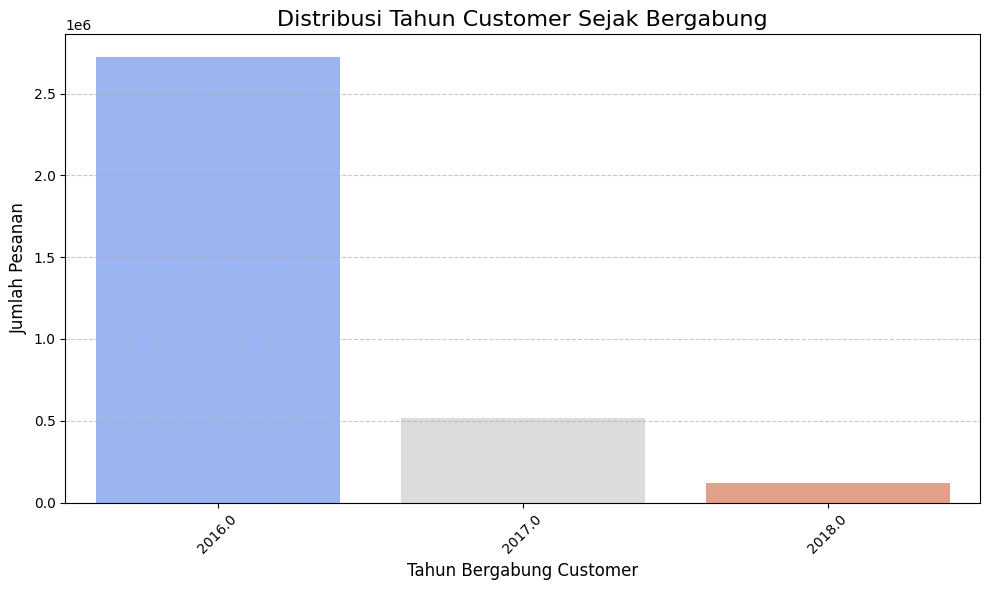

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19968\1489230025.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='status', data=df_merged,


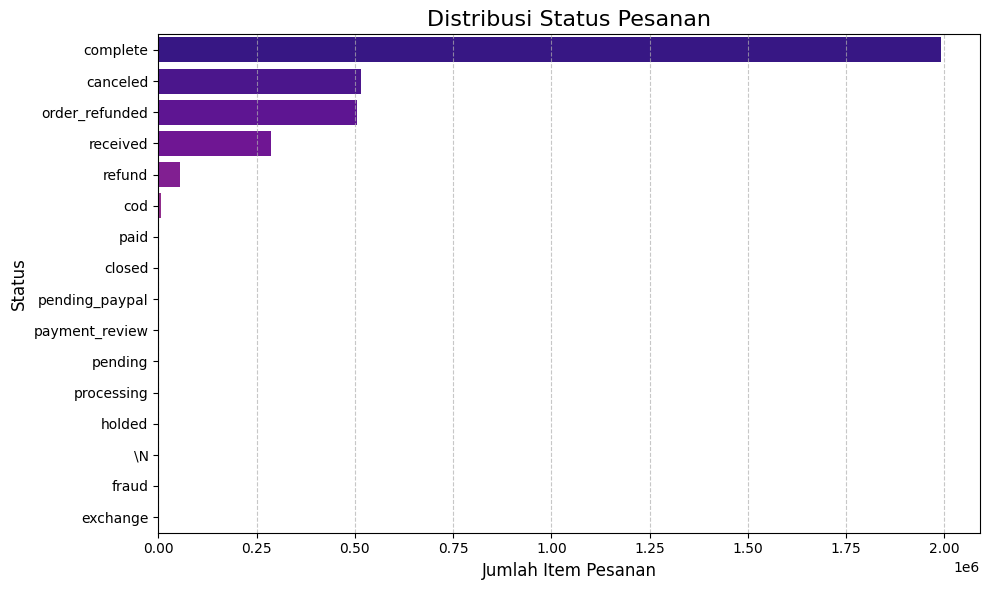

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19968\1489230025.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='payment_method', data=df_merged,


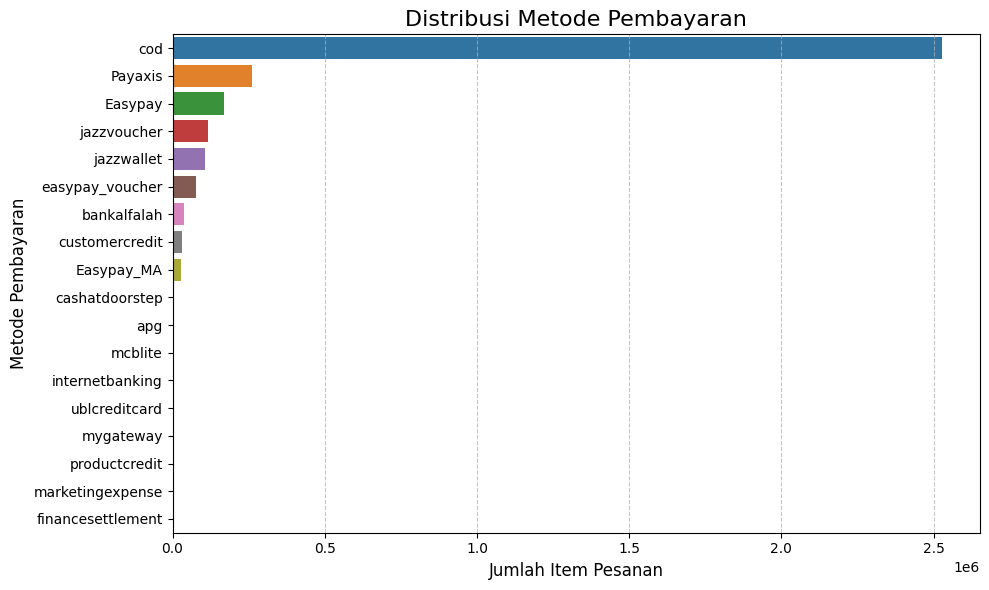

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19968\1489230025.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_net_sales.values, y=status_net_sales.index, palette='viridis')


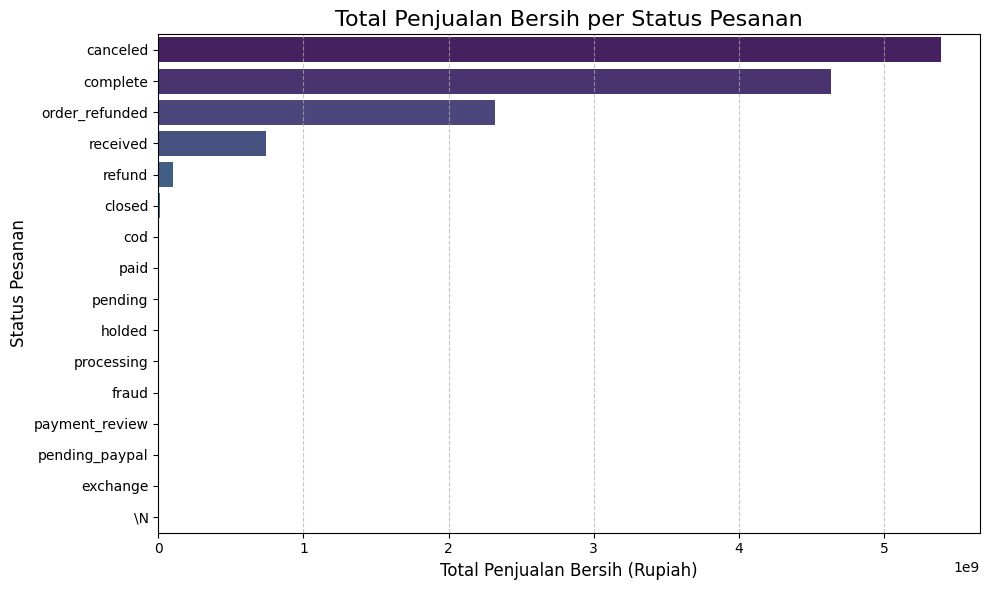

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19968\1489230025.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_net_sales.values, y=payment_net_sales.index, palette='magma')


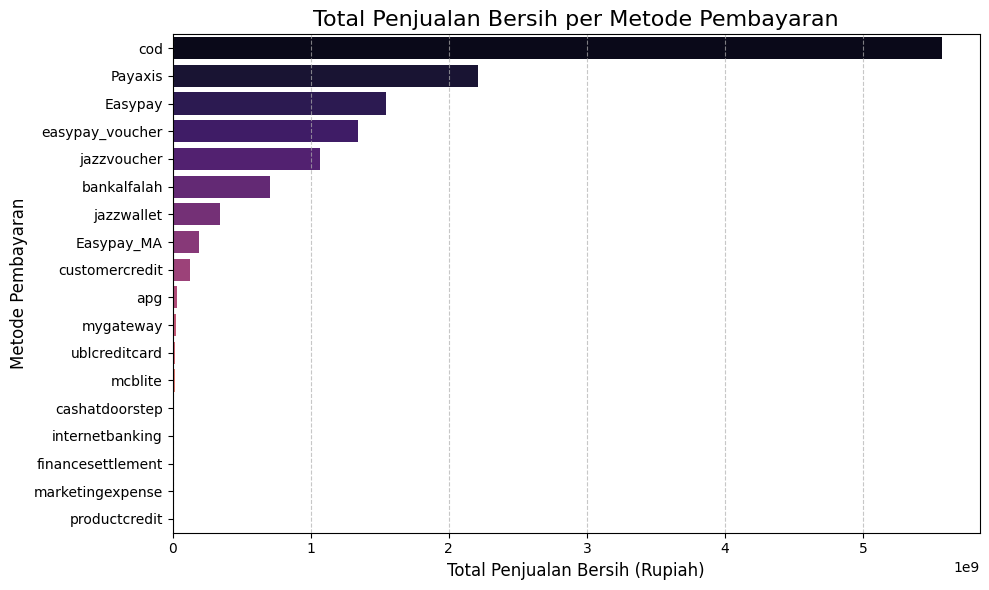

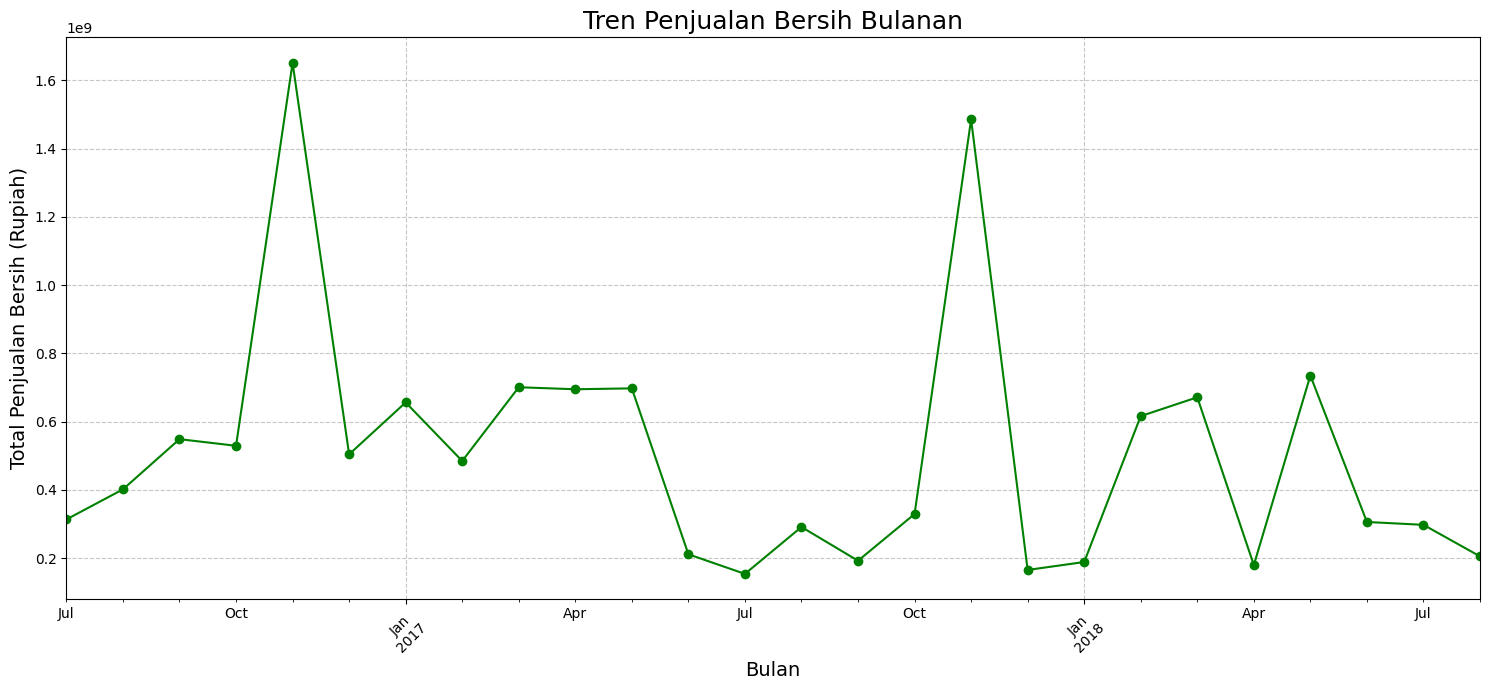

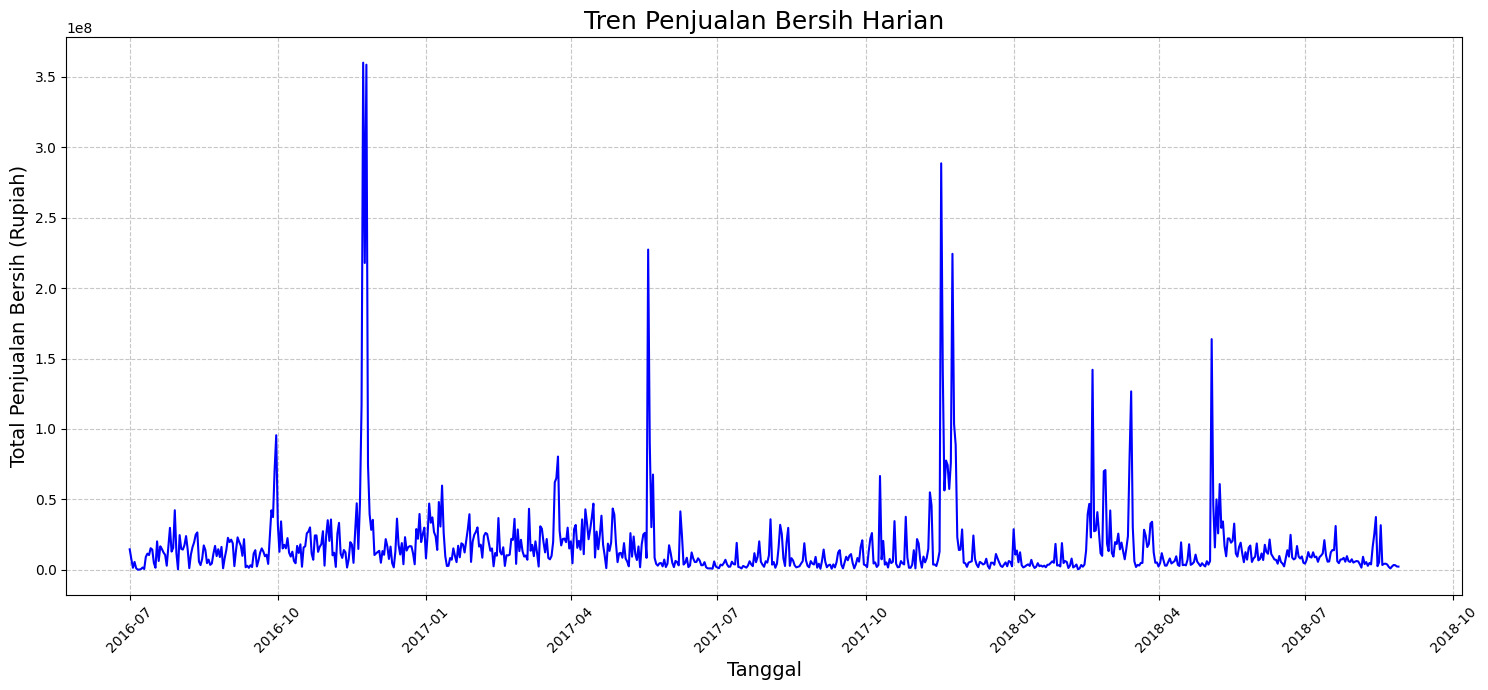

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19968\1489230025.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category_name_1', data=df_merged,


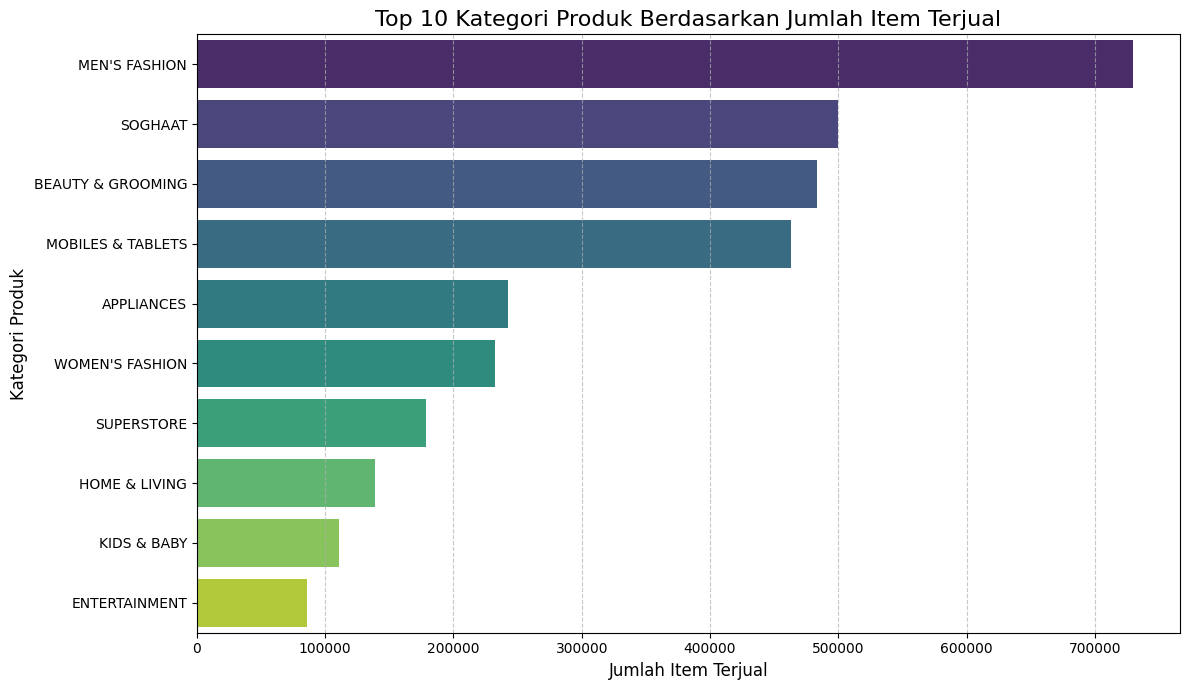

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19968\1489230025.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_net_sales_df.values, y=category_net_sales_df.index, palette='magma')


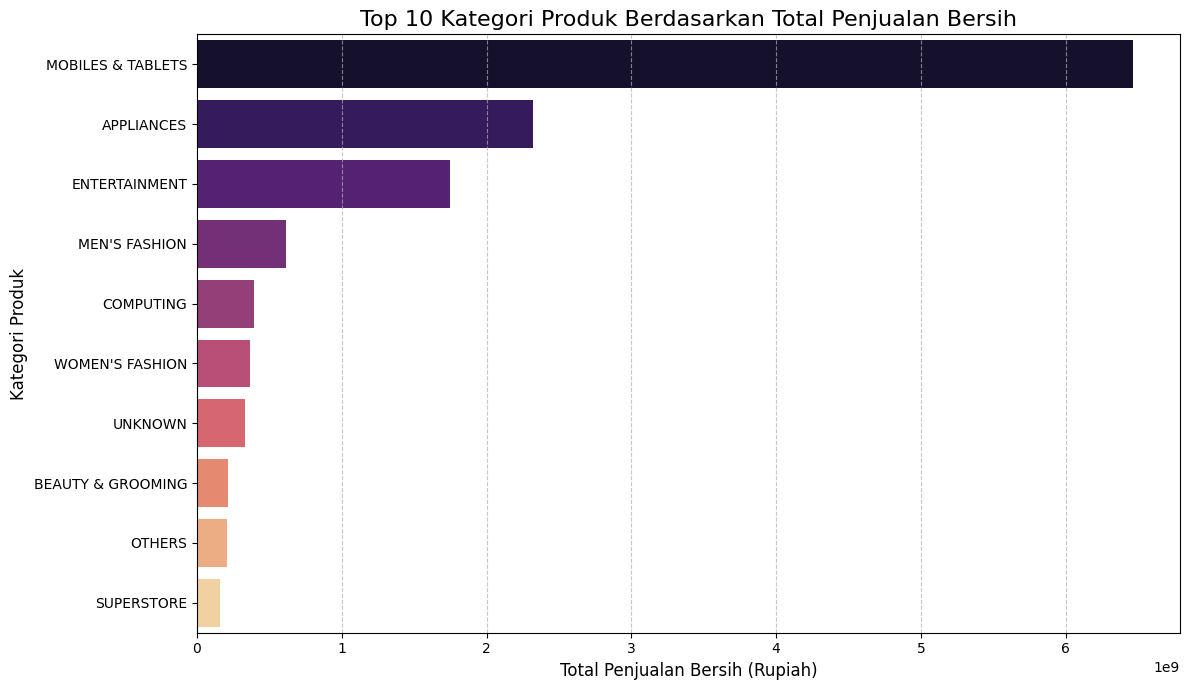

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19968\1489230025.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sku_net_sales.values, y=top_sku_net_sales.index, palette='crest')


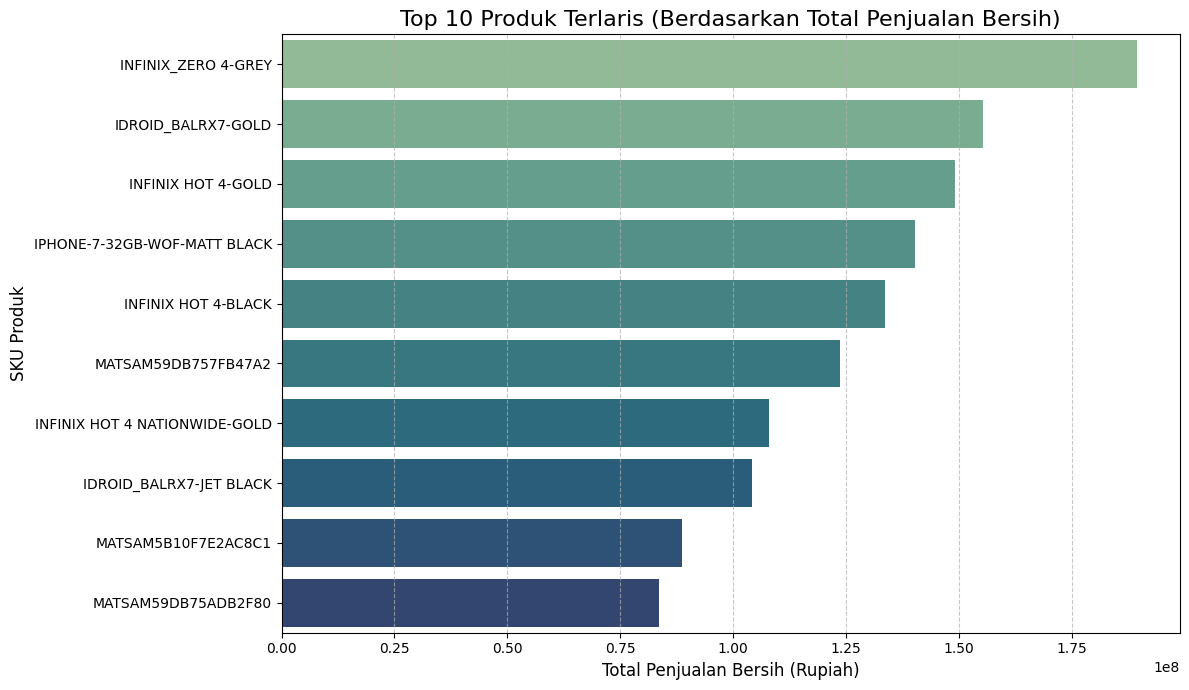

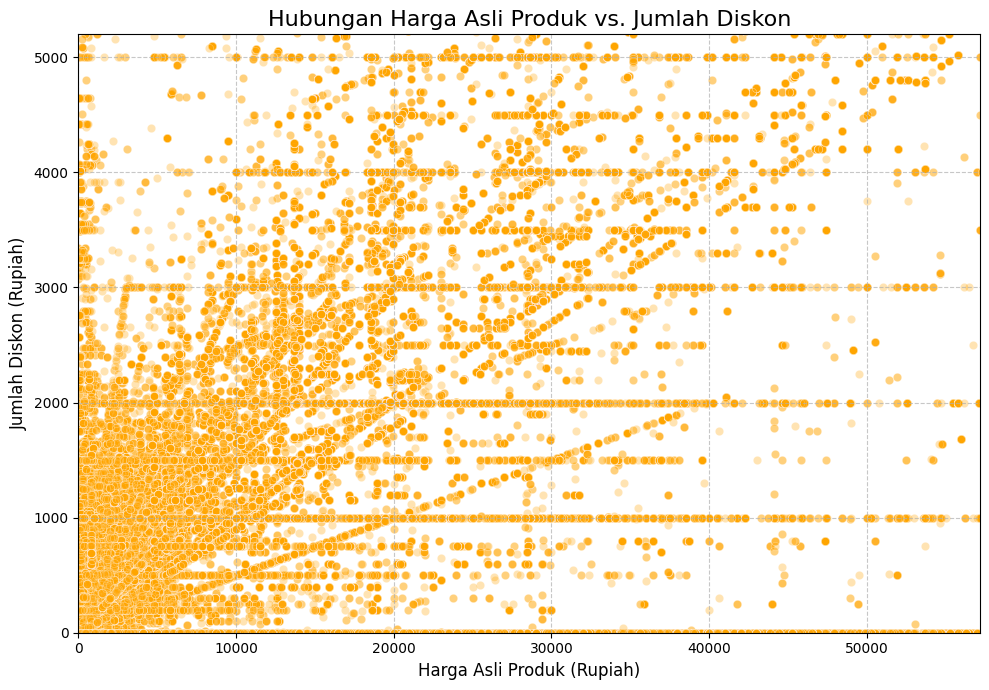

In [402]:
print("\n--- Analisis Mendalam dan Visualisasi ---")

#Ringkasan Statistik df_merged
print("\n--- Ringkasan Statistik df_merged ---")
print(df_merged.describe())

#Analisis Customer
# Distribusi Customer Since (Tahun)
df_merged['customer_since_year'] = df_merged['Customer Since'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_since_year', data=df_merged, palette='coolwarm',
              order=df_merged['customer_since_year'].value_counts().index)
plt.title('Distribusi Tahun Customer Sejak Bergabung', fontsize=16)
plt.xlabel('Tahun Bergabung Customer', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Analisis Pesanan
# Distribusi Status Pesanan
plt.figure(figsize=(10, 6))
sns.countplot(y='status', data=df_merged,
              order=df_merged['status'].value_counts().index,
              palette='plasma')
plt.title('Distribusi Status Pesanan', fontsize=16)
plt.xlabel('Jumlah Item Pesanan', fontsize=12) # Note: ini per item, bukan per order unik
plt.ylabel('Status', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Distribusi Metode Pembayaran
plt.figure(figsize=(10, 6))
sns.countplot(y='payment_method', data=df_merged,
              order=df_merged['payment_method'].value_counts().index,
              palette='tab10')
plt.title('Distribusi Metode Pembayaran', fontsize=16)
plt.xlabel('Jumlah Item Pesanan', fontsize=12)
plt.ylabel('Metode Pembayaran', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Penjualan Bersih per Status Pesanan
status_net_sales = df_merged.groupby('status')['net_item_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=status_net_sales.values, y=status_net_sales.index, palette='viridis')
plt.title('Total Penjualan Bersih per Status Pesanan', fontsize=16)
plt.xlabel('Total Penjualan Bersih (Rupiah)', fontsize=12)
plt.ylabel('Status Pesanan', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Penjualan Bersih per Metode Pembayaran
payment_net_sales = df_merged.groupby('payment_method')['net_item_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_net_sales.values, y=payment_net_sales.index, palette='magma')
plt.title('Total Penjualan Bersih per Metode Pembayaran', fontsize=16)
plt.xlabel('Total Penjualan Bersih (Rupiah)', fontsize=12)
plt.ylabel('Metode Pembayaran', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Tren Penjualan Bersih Bulanan
df_merged['order_month'] = df_merged['created_at'].dt.to_period('M')
monthly_net_sales = df_merged.groupby('order_month')['net_item_sales'].sum()
plt.figure(figsize=(15, 7))
monthly_net_sales.plot(kind='line', marker='o', color='green', linestyle='-')
plt.title('Tren Penjualan Bersih Bulanan', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penjualan Bersih (Rupiah)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tren Penjualan Bersih Harian (dari data pertama hingga data terakhir)
daily_net_sales = df_merged.groupby(df_merged['created_at'].dt.date)['net_item_sales'].sum()
plt.figure(figsize=(15, 7))
daily_net_sales.plot(kind='line', color='blue', linestyle='-')
plt.title('Tren Penjualan Bersih Harian', fontsize=18)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Total Penjualan Bersih (Rupiah)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Analisis Produk
# Distribusi Kategori Produk (berdasarkan jumlah item)
plt.figure(figsize=(12, 7))
sns.countplot(y='category_name_1', data=df_merged,
              order=df_merged['category_name_1'].value_counts().head(10).index, # Ambil 10 teratas
              palette='viridis')
plt.title('Top 10 Kategori Produk Berdasarkan Jumlah Item Terjual', fontsize=16)
plt.xlabel('Jumlah Item Terjual', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Total Penjualan Bersih per Kategori Produk
category_net_sales_df = df_merged.groupby('category_name_1')['net_item_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=category_net_sales_df.values, y=category_net_sales_df.index, palette='magma')
plt.title('Top 10 Kategori Produk Berdasarkan Total Penjualan Bersih', fontsize=16)
plt.xlabel('Total Penjualan Bersih (Rupiah)', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top 10 SKU Terlaris (berdasarkan net_item_sales)
top_sku_net_sales = df_merged.groupby('sku')['net_item_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_sku_net_sales.values, y=top_sku_net_sales.index, palette='crest')
plt.title('Top 10 Produk Terlaris (Berdasarkan Total Penjualan Bersih)', fontsize=16)
plt.xlabel('Total Penjualan Bersih (Rupiah)', fontsize=12)
plt.ylabel('SKU Produk', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Hubungan antar Variabel
# Hubungan antara Harga Asli Produk dan Jumlah Diskon
plt.figure(figsize=(10, 7))
sns.scatterplot(x='product_original_price', y='discount_amount', data=df_merged, alpha=0.3, color='orange')
plt.title('Hubungan Harga Asli Produk vs. Jumlah Diskon', fontsize=16)
plt.xlabel('Harga Asli Produk (Rupiah)', fontsize=12)
plt.ylabel('Jumlah Diskon (Rupiah)', fontsize=12)
# Batasi sumbu X dan Y untuk visualisasi yang lebih baik jika ada outlier ekstrem
plt.xlim(0, df_merged['product_original_price'].quantile(0.99))
plt.ylim(0, df_merged['discount_amount'].quantile(0.99))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [1]:
pip install git-filter-repo

     -------------------------------------- 76.3/76.3 kB 846.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
